In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
pwd

'C:\\Users\\HP\\PYTHON Alabs\\MACHINE LEARNING Term 2.2\\Case Studies\\Case Study 4 - Marketing'

In [4]:
file_path = 'C:\\Users\\HP\\PYTHON Alabs\\MACHINE LEARNING Term 2.2\\Case Studies\\Case Study 4 - Marketing\\data\\'

In [5]:
# Load data using file paths
online_sales = pd.read_csv(file_path + 'Online_Sales.csv')
customers_data = pd.read_excel(file_path + 'CustomersData.xlsx')
marketing_spend = pd.read_csv(file_path + 'Marketing_Spend.csv')
discount_coupon = pd.read_csv(file_path + 'Discount_Coupon.csv')
tax_amount = pd.read_excel(file_path + 'Tax_amount.xlsx')

In [6]:
# Displaying the head of each dataframe to confirm successful load
print("Online Sales Data:\n", online_sales.head(2))
print("\nCustomers Data:\n", customers_data.head(2))
print("\nMarketing Spend Data:\n", marketing_spend.head(2))
print("\nDiscount Coupon Data:\n", discount_coupon.head(2))
print("\nTax Amount Data:\n", tax_amount.head(2))

Online Sales Data:
    CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0       17850           16679          20190101  GGOENEBJ079499   
1       17850           16680          20190101  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  

Customers Data:
    CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43

Marketing Spend Data:
        Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36

Discount Coupon Data:
   Month Product_Category  Coupon_Code  Discount_pct
0 

In [7]:
online_sales.info()
customers_data.info()
marketing_spend.info()
discount_coupon.info()
tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   i

### Missing Values

In [9]:
# Check for missing values
print("Missing values in each dataframe:")
print("Online Sales:", online_sales.isnull().sum())
print("Customers Data:", customers_data.isnull().sum())
print("Marketing Spend:", marketing_spend.isnull().sum())
print("Discount Coupon:", discount_coupon.isnull().sum())
print("Tax Amount:", tax_amount.isnull().sum())

Missing values in each dataframe:
Online Sales: CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64
Customers Data: CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64
Marketing Spend: Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64
Discount Coupon: Month                0
Product_Category     0
Coupon_Code          0
Discount_pct         0
dtype: int64
Tax Amount: Product_Category    0
GST                 0
dtype: int64


### Duplicate values

In [11]:
# Check for duplicates in all dataframes
print("Duplicates in Online Sales:", online_sales.duplicated().sum())
print("Duplicates in Customers Data:", customers_data.duplicated().sum())
print("Duplicates in Marketing Spend:", marketing_spend.duplicated().sum())
print("Duplicates in Discount Coupon:", discount_coupon.duplicated().sum())
print("Duplicates in Tax Amount:", tax_amount.duplicated().sum())

Duplicates in Online Sales: 0
Duplicates in Customers Data: 0
Duplicates in Marketing Spend: 0
Duplicates in Discount Coupon: 0
Duplicates in Tax Amount: 0


# Merging the Data

### Converting the Datatypes 

In [14]:
# 1. Convert 'Transaction_Date' and 'Date' columns to datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'], format='%Y%m%d')
marketing_spend['Date'] = pd.to_datetime(marketing_spend['Date'], format='%m/%d/%Y')

# 2. Create a new 'Month' column in online_sales to facilitate joining with discount_coupon
online_sales['Month'] = online_sales['Transaction_Date'].dt.strftime('%b')

### MERGING

In [16]:
# 3. Merge datasets in order

# Step 1: Merge customers data with online sales on 'CustomerID'
merged_data = pd.merge(online_sales, customers_data, on='CustomerID', how='left')

In [17]:
# Check if 'Product_Category' and 'Month' exist in both merged_data and discount_coupon
print("Columns in merged_data:", merged_data.columns)
print("Columns in discount_coupon:", discount_coupon.columns)

Columns in merged_data: Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Gender', 'Location',
       'Tenure_Months'],
      dtype='object')
Columns in discount_coupon: Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')


In [18]:
# Remove any leading or trailing spaces in column names of discount_coupon
discount_coupon.columns = discount_coupon.columns.str.strip()

In [19]:
# Now proceed with the merge

# Step 2: Merge discount_coupon with merged_data on 'Month' and 'Product_Category'
merged_data = pd.merge(merged_data, discount_coupon, on=['Month', 'Product_Category'], how='left')

# Step 3: Merge tax_amount with merged_data on 'Product_Category'
merged_data = pd.merge(merged_data, tax_amount, on='Product_Category', how='left')

# Step 4: Merge marketing_spend with merged_data on 'Transaction_Date' and 'Date'
merged_data = pd.merge(merged_data, marketing_spend, left_on='Transaction_Date', right_on='Date', how='left')

In [20]:
# Check for missing values in each column of merged_data
missing_values = merged_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Display only columns with missing values

Missing values in each column:
Coupon_Code     400
Discount_pct    400
dtype: int64


In [21]:
# 4. Fill missing values in 'Coupon_Code' and 'Discount_pct'
merged_data['Coupon_Code'].fillna('Not Available', inplace=True)
merged_data['Discount_pct'].fillna(0, inplace=True)


# Check the final merged data structure
print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Gender               52924 non-null  object        
 12  Location             52924 non-null  object        
 13  Tenure_Months        52924 non-

# 1. Invoice Value Calculation
Calculate Invoice amount or sale_amount or revenue for each transaction and item level- `Invoice Value = (( Quantity * Avg_price ) * ( 1 - Discount_pct ) * ( 1 + GST )) + Delivery_Charges`


In [23]:
# Calculate Invoice Value for each transaction and item level
merged_data['Invoice_Value'] = ((merged_data['Quantity'] * merged_data['Avg_Price']) * 
                                (1 - merged_data['Discount_pct'] / 100) * 
                                (1 + merged_data['GST'])) + merged_data['Delivery_Charges']

merged_data['Invoice_Value']

0        158.67290
1        158.67290
2          8.52950
3         99.58430
4         24.02300
           ...    
52919     99.90100
52920     46.90792
52921    123.44760
52922    316.50200
52923    267.99160
Name: Invoice_Value, Length: 52924, dtype: float64

# 2. Perform Detailed exploratory analysis

### Understanding how many customers acquired every month

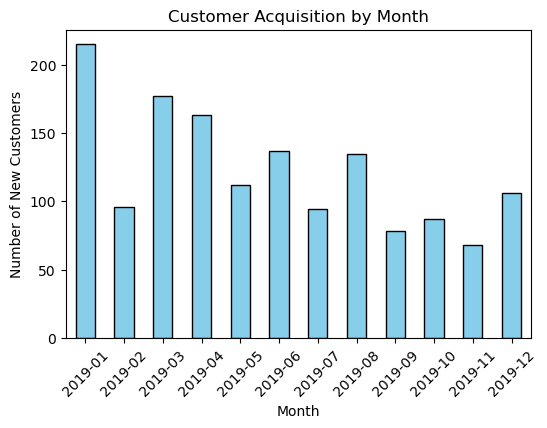

In [26]:
# Step 1: Extract month and year from the 'Transaction_Date'
merged_data['YearMonth'] = merged_data['Transaction_Date'].dt.to_period('M')

# Step 2: Find the first transaction date for each customer to identify new customers
new_customers = merged_data.groupby('CustomerID')['YearMonth'].min().reset_index()
monthly_acquisition = new_customers['YearMonth'].value_counts().sort_index()

# Step 3: Plotting
plt.figure(figsize=(6, 4))
monthly_acquisition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Customer Acquisition by Month")
plt.xlabel("Month")
plt.ylabel("Number of New Customers")
plt.xticks(rotation=45)
plt.show()


### Understand the retention of customers on month on month basis

In [28]:
# Group by month and customer to identify unique customers each month
merged_data['Month_Year'] = merged_data['Transaction_Date'].dt.to_period('M')
monthly_customers = merged_data.groupby('Month_Year')['CustomerID'].nunique()

# Identify retained customers for each month
retention_data = (
    merged_data.groupby(['Month_Year', 'CustomerID'])
    .size()
    .unstack(fill_value=0)
    .cumsum(axis=1)
    .apply(lambda x: x > 1).astype(int)
)

retained_customers = retention_data.sum(axis=1)

# Create a DataFrame for easier visualization
retention_df = pd.DataFrame({
    'Unique_Customers': monthly_customers,
    'Retained_Customers': retained_customers
}).reset_index()

# Calculate Retention Rate
retention_df['Retention_Rate'] = (
    retention_df['Retained_Customers'] / retention_df['Unique_Customers'] * 100
)


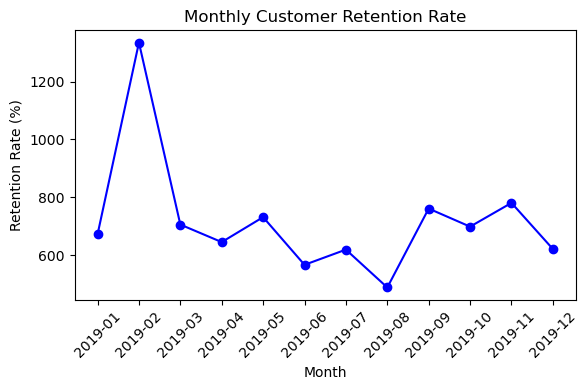

In [29]:
# Plot the retention rate over time
plt.figure(figsize=(6, 4))
plt.plot(retention_df['Month_Year'].astype(str), retention_df['Retention_Rate'], marker='o', color='b')
plt.title("Monthly Customer Retention Rate")
plt.xlabel("Month")
plt.ylabel("Retention Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How the revenues from existing/new customers on month on month basis

##### Step 1: Label New and Existing Customers

In [32]:
# Convert Transaction_Date to period for monthly grouping
merged_data['Month_Year'] = merged_data['Transaction_Date'].dt.to_period('M')

# Identify first purchase month for each customer
first_purchase = merged_data.groupby('CustomerID')['Month_Year'].min().reset_index()
first_purchase.columns = ['CustomerID', 'First_Purchase_Month']

# Merge first purchase month with the main data
merged_data = pd.merge(merged_data, first_purchase, on='CustomerID', how='left')

# Label transactions as 'New' or 'Existing' based on purchase month
merged_data['Customer_Type'] = np.where(
    merged_data['Month_Year'] == merged_data['First_Purchase_Month'], 'New', 'Existing'
)

##### Step 2: Calculate Revenue for Each Customer Type by Month

In [34]:
# Calculate monthly revenue for each customer type using 'Invoice_Value'
monthly_revenue = merged_data.groupby(['Month_Year', 'Customer_Type'])['Invoice_Value'].sum().unstack().fillna(0)
monthly_revenue.columns = ['Existing_Revenue', 'New_Revenue']
monthly_revenue.reset_index(inplace=True)

##### Step 3: Plot Monthly Revenue for New vs. Existing Customers

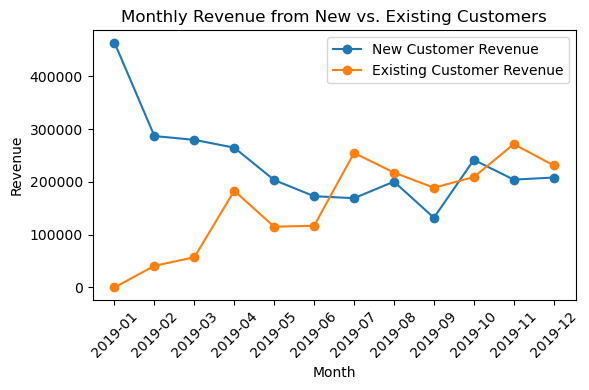

In [36]:
# Plot revenue trends for new vs. existing customers
plt.figure(figsize=(6, 4))
plt.plot(monthly_revenue['Month_Year'].astype(str), monthly_revenue['New_Revenue'], label='New Customer Revenue', marker='o')
plt.plot(monthly_revenue['Month_Year'].astype(str), monthly_revenue['Existing_Revenue'], label='Existing Customer Revenue', marker='o')
plt.title("Monthly Revenue from New vs. Existing Customers")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### How the discounts playing role in the revenues?

In [38]:
# Calculate the correlation between Discount_pct and Invoice_Value
correlation = merged_data[['Discount_pct', 'Invoice_Value']].corr()
correlation

,Discount_pct,Invoice_Value
Discount_pct,1.000000,-0.055953
Invoice_Value,-0.055953,1.000000


- Weak Negative Correlation: A correlation of -0.056 indicates a very weak inverse relationship between Discount_pct and Invoice_Value.
- Small Impact: As discounts increase, invoice values slightly decrease, but the effect is minimal.
- Other Factors: Other variables likely have a stronger influence on invoice values.

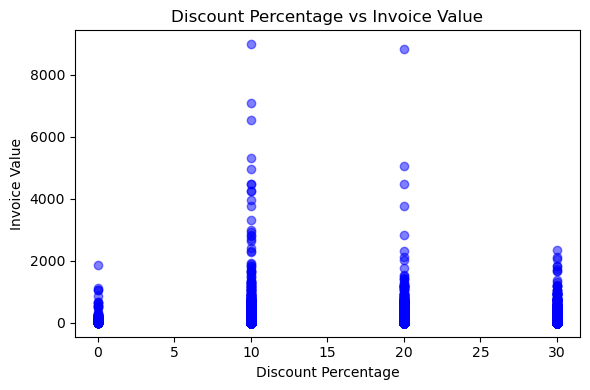

In [40]:
# Scatter plot showing the relationship between Discount_pct and Invoice_Value
plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Discount_pct'], merged_data['Invoice_Value'], alpha=0.5, color='blue')
plt.title('Discount Percentage vs Invoice Value')
plt.xlabel('Discount Percentage')
plt.ylabel('Invoice Value')
plt.tight_layout()
plt.show()

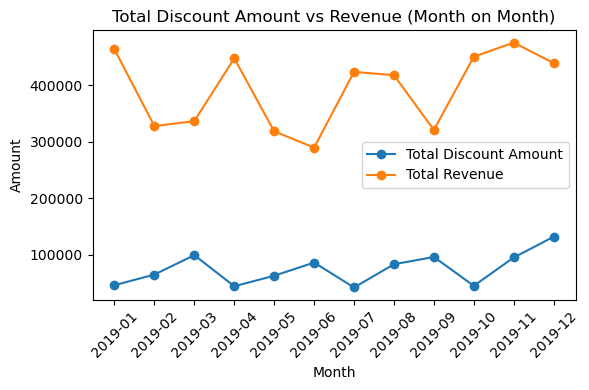

In [41]:
# Calculate the total discount given per month
merged_data['Discount_Amount'] = merged_data['Invoice_Value'] * (merged_data['Discount_pct'] / 100)

# Group by month and calculate the sum of Discount_Amount and Invoice_Value
monthly_discount_revenue = merged_data.groupby('Month_Year').agg({
    'Discount_Amount': 'sum',
    'Invoice_Value': 'sum'
}).reset_index()

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(monthly_discount_revenue['Month_Year'].astype(str), monthly_discount_revenue['Discount_Amount'], label='Total Discount Amount', marker='o')
plt.plot(monthly_discount_revenue['Month_Year'].astype(str), monthly_discount_revenue['Invoice_Value'], label='Total Revenue', marker='o')
plt.title("Total Discount Amount vs Revenue (Month on Month)")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

###  Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc.


#### 1. Revenue by Category, Month, Week, Day

In [44]:
# Code:

# Revenue by Month
monthly_revenue = merged_data.groupby(['Month_Year'])['Invoice_Value'].sum().reset_index()

# Revenue by Product Category
category_revenue = merged_data.groupby(['Product_Category'])['Invoice_Value'].sum().reset_index()

# Revenue by Week
merged_data['Week'] = merged_data['Transaction_Date'].dt.isocalendar().week
weekly_revenue = merged_data.groupby(['Week'])['Invoice_Value'].sum().reset_index()

# Revenue by Day
merged_data['Day'] = merged_data['Transaction_Date'].dt.day_name()
daily_revenue = merged_data.groupby(['Day'])['Invoice_Value'].sum().reset_index()

<Axes: title={'center': 'Revenue by Day'}, xlabel='Day'>

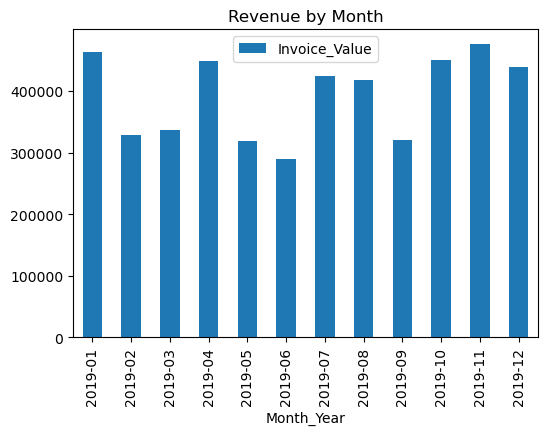

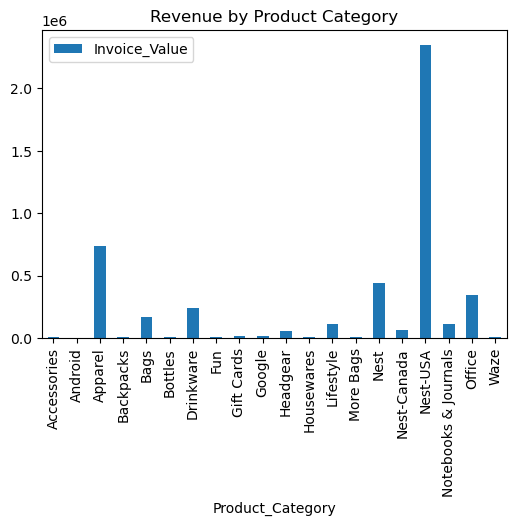

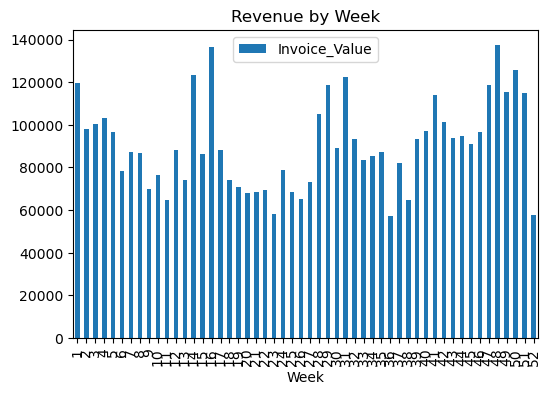

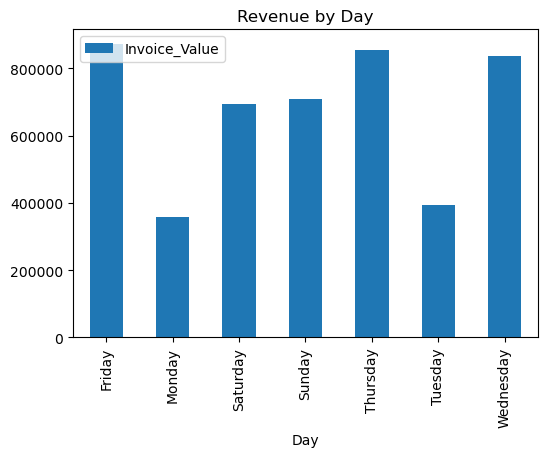

In [45]:
# Visualizations:
# Revenue by Month
monthly_revenue.plot(x='Month_Year', y='Invoice_Value', kind='bar', figsize=(6, 4), title="Revenue by Month")

# Revenue by Product Category
category_revenue.plot(x='Product_Category', y='Invoice_Value', kind='bar', figsize=(6, 4), title="Revenue by Product Category")

# Revenue by Week
weekly_revenue.plot(x='Week', y='Invoice_Value', kind='bar', figsize=(6, 4), title="Revenue by Week")

# Revenue by Day
daily_revenue.plot(x='Day', y='Invoice_Value', kind='bar', figsize=(6, 4), title="Revenue by Day")

#### 2. Number of Orders by Category, Month, Week, Day

In [47]:
# Code:
# Number of Orders by Month
monthly_orders = merged_data.groupby(['Month_Year'])['Transaction_ID'].nunique().reset_index()

# Number of Orders by Product Category
category_orders = merged_data.groupby(['Product_Category'])['Transaction_ID'].nunique().reset_index()

# Number of Orders by Week
weekly_orders = merged_data.groupby(['Week'])['Transaction_ID'].nunique().reset_index()

# Number of Orders by Day
daily_orders = merged_data.groupby(['Day'])['Transaction_ID'].nunique().reset_index()

<Axes: title={'center': 'Number of Orders by Day'}, xlabel='Day'>

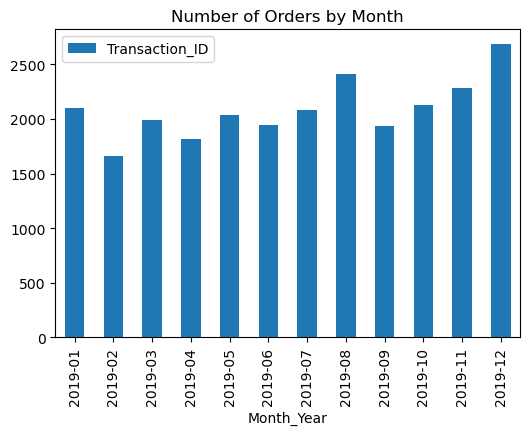

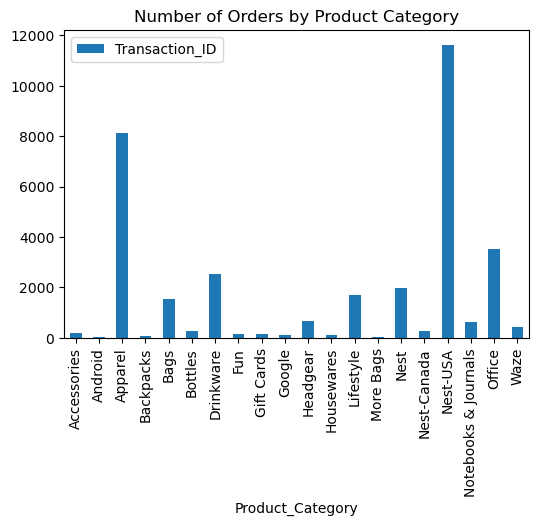

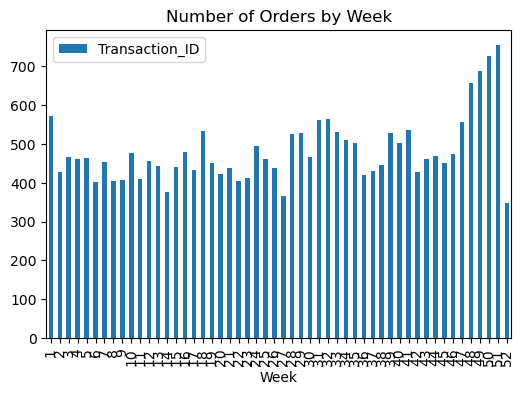

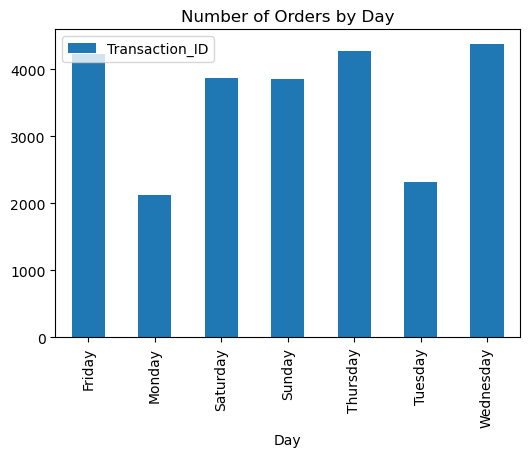

In [48]:
# Visualizations:
# Number of Orders by Month
monthly_orders.plot(x='Month_Year', y='Transaction_ID', kind='bar', figsize=(6, 4), title="Number of Orders by Month")

# Number of Orders by Product Category
category_orders.plot(x='Product_Category', y='Transaction_ID', kind='bar', figsize=(6, 4), title="Number of Orders by Product Category")

# Number of Orders by Week
weekly_orders.plot(x='Week', y='Transaction_ID', kind='bar', figsize=(6, 4), title="Number of Orders by Week")

# Number of Orders by Day
daily_orders.plot(x='Day', y='Transaction_ID', kind='bar', figsize=(6, 4), title="Number of Orders by Day")

#### 3. Average Order Value (AOV) by Category, Month, Week, Day

In [50]:
# Code:
# Average Order Value by Month
monthly_AOV = merged_data.groupby(['Month_Year'])['Invoice_Value'].mean().reset_index()

# Average Order Value by Product Category
category_AOV = merged_data.groupby(['Product_Category'])['Invoice_Value'].mean().reset_index()

# Average Order Value by Week
weekly_AOV = merged_data.groupby(['Week'])['Invoice_Value'].mean().reset_index()

# Average Order Value by Day
daily_AOV = merged_data.groupby(['Day'])['Invoice_Value'].mean().reset_index()

<Axes: title={'center': 'Average Order Value by Day'}, xlabel='Day'>

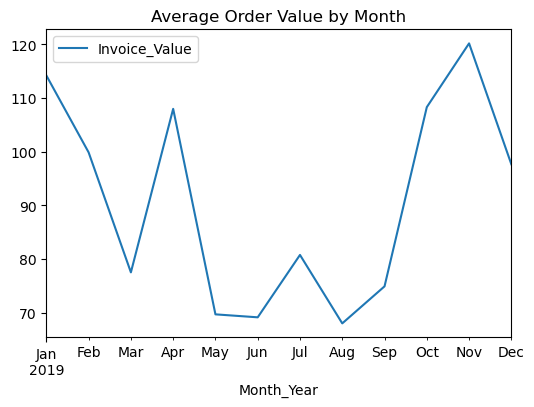

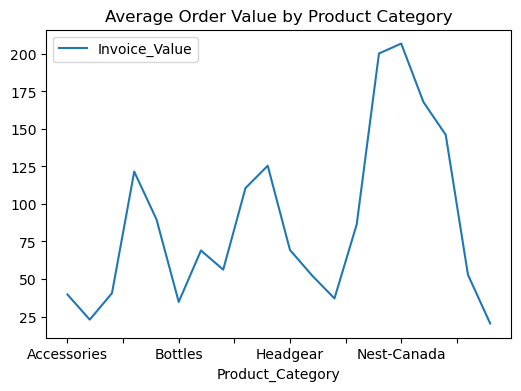

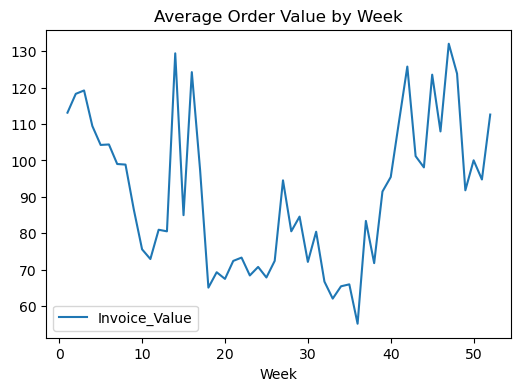

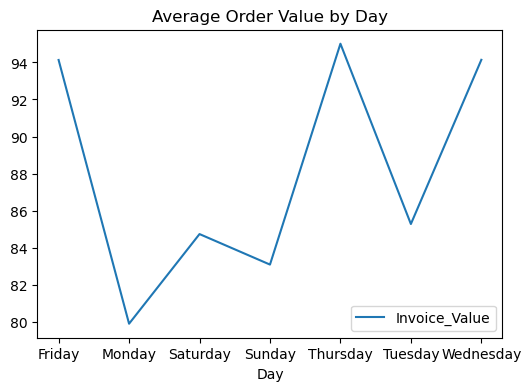

In [51]:
# Visualizations:
# Average Order Value by Month
monthly_AOV.plot(x='Month_Year', y='Invoice_Value', kind='line', figsize=(6, 4), title="Average Order Value by Month")

# Average Order Value by Product Category
category_AOV.plot(x='Product_Category', y='Invoice_Value', kind='line', figsize=(6, 4), title="Average Order Value by Product Category")

# Average Order Value by Week
weekly_AOV.plot(x='Week', y='Invoice_Value', kind='line', figsize=(6, 4), title="Average Order Value by Week")

# Average Order Value by Day
daily_AOV.plot(x='Day', y='Invoice_Value', kind='line', figsize=(6, 4), title="Average Order Value by Day")

#### 4. Number of Customers (Existing/New) by Category, Month, Week, Day

In [53]:
# Code:
# Number of Customers by Month (Existing/New)
monthly_customers = merged_data.groupby(['Month_Year', 'Customer_Type'])['CustomerID'].nunique().unstack().fillna(0)

# Number of Customers by Product Category (Existing/New)
category_customers = merged_data.groupby(['Product_Category', 'Customer_Type'])['CustomerID'].nunique().unstack().fillna(0)

# Number of Customers by Week (Existing/New)
weekly_customers = merged_data.groupby(['Week', 'Customer_Type'])['CustomerID'].nunique().unstack().fillna(0)

# Number of Customers by Day (Existing/New)
daily_customers = merged_data.groupby(['Day', 'Customer_Type'])['CustomerID'].nunique().unstack().fillna(0)

<Axes: title={'center': 'Number of Customers by Day'}, xlabel='Day'>

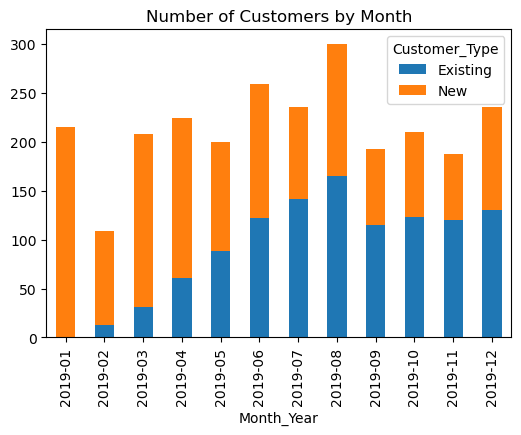

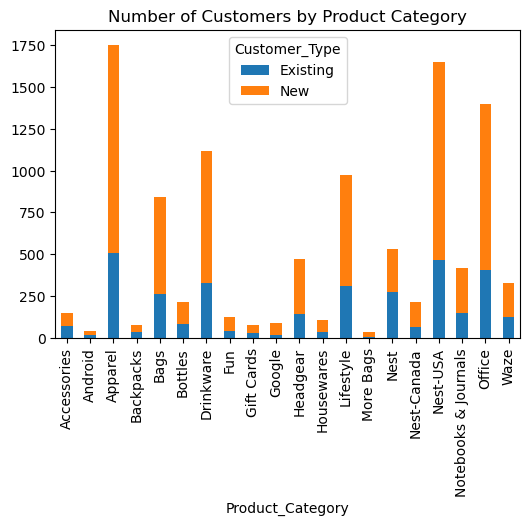

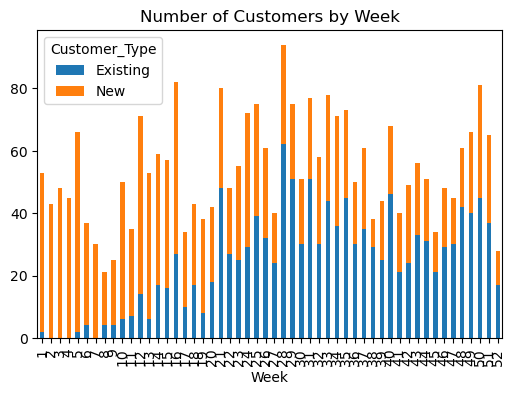

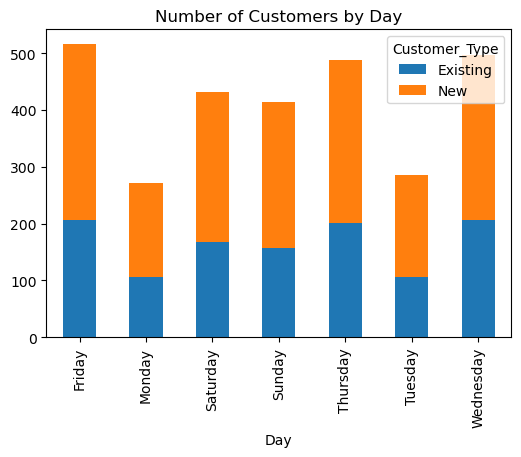

In [54]:
# Visualizations:
# Number of Customers by Month
monthly_customers.plot(kind='bar', figsize=(6, 4), stacked=True, title="Number of Customers by Month")

# Number of Customers by Product Category
category_customers.plot(kind='bar', figsize=(6, 4), stacked=True, title="Number of Customers by Product Category")

# Number of Customers by Week
weekly_customers.plot(kind='bar', figsize=(6, 4), stacked=True, title="Number of Customers by Week")

# Number of Customers by Day
daily_customers.plot(kind='bar', figsize=(6, 4), stacked=True, title="Number of Customers by Day")

#### 5. Quantity by Category, Month, Week, Day

In [56]:
# Code:
# Quantity by Month
monthly_quantity = merged_data.groupby(['Month_Year'])['Quantity'].sum().reset_index()

# Quantity by Product Category
category_quantity = merged_data.groupby(['Product_Category'])['Quantity'].sum().reset_index()

# Quantity by Week
weekly_quantity = merged_data.groupby(['Week'])['Quantity'].sum().reset_index()

# Quantity by Day
daily_quantity = merged_data.groupby(['Day'])['Quantity'].sum().reset_index()

<Axes: title={'center': 'Quantity by Day'}, xlabel='Day'>

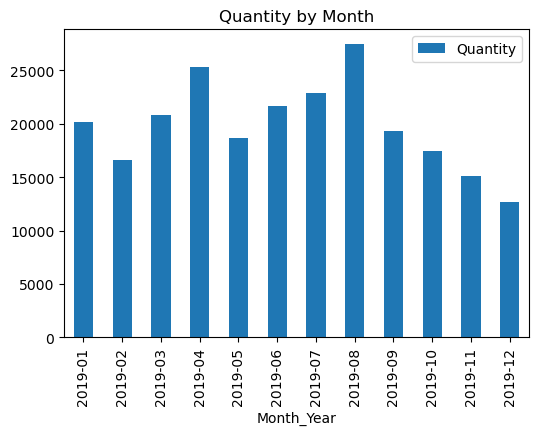

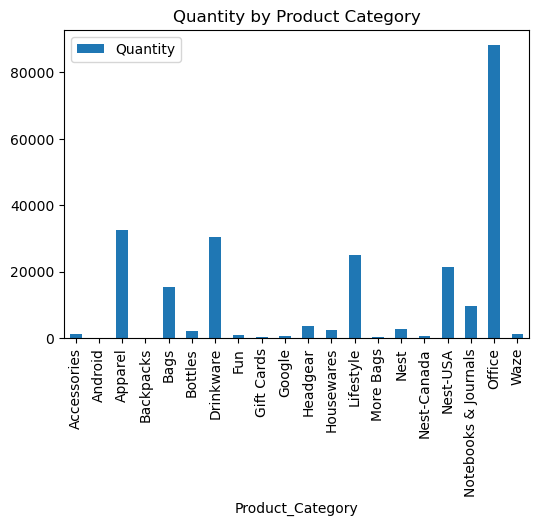

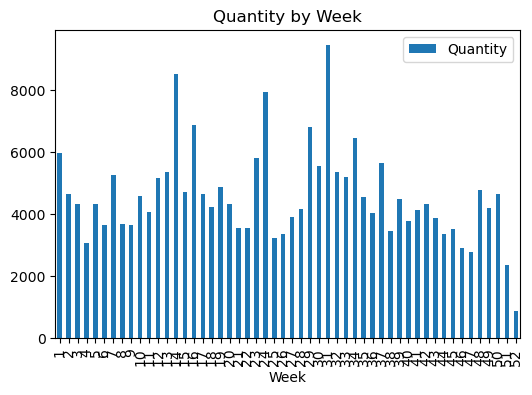

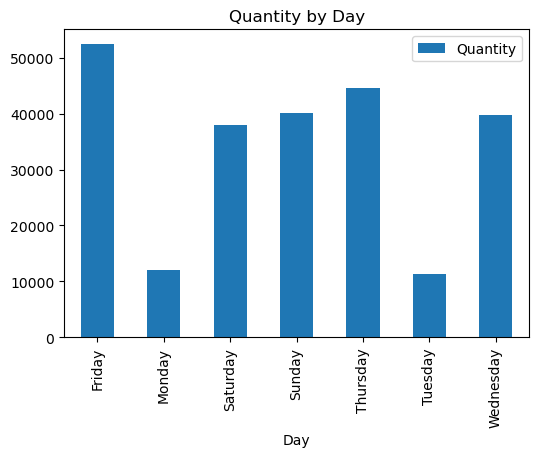

In [57]:
# Visualizations:
# Quantity by Month
monthly_quantity.plot(x='Month_Year', y='Quantity', kind='bar', figsize=(6, 4), title="Quantity by Month")

# Quantity by Product Category
category_quantity.plot(x='Product_Category', y='Quantity', kind='bar', figsize=(6, 4), title="Quantity by Product Category")

# Quantity by Week
weekly_quantity.plot(x='Week', y='Quantity', kind='bar', figsize=(6, 4), title="Quantity by Week")

# Quantity by Day
daily_quantity.plot(x='Day', y='Quantity', kind='bar', figsize=(6, 4), title="Quantity by Day")

###  Understand the trends/seasonality of sales by category, location, month etc

#### 1. Sales Trends by Category, Month, Location

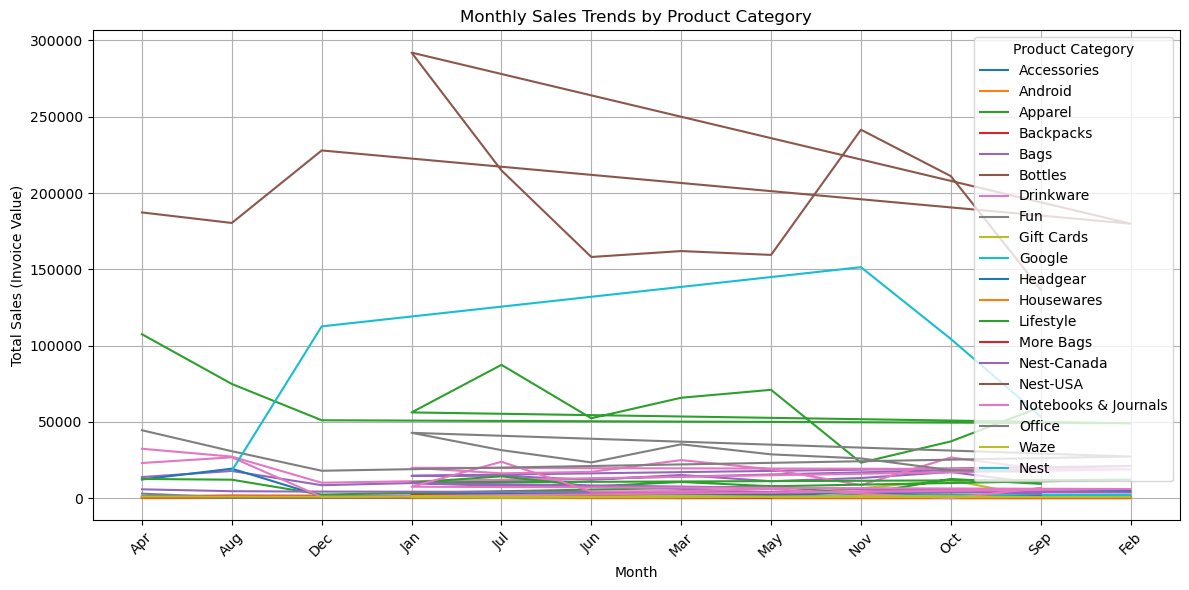

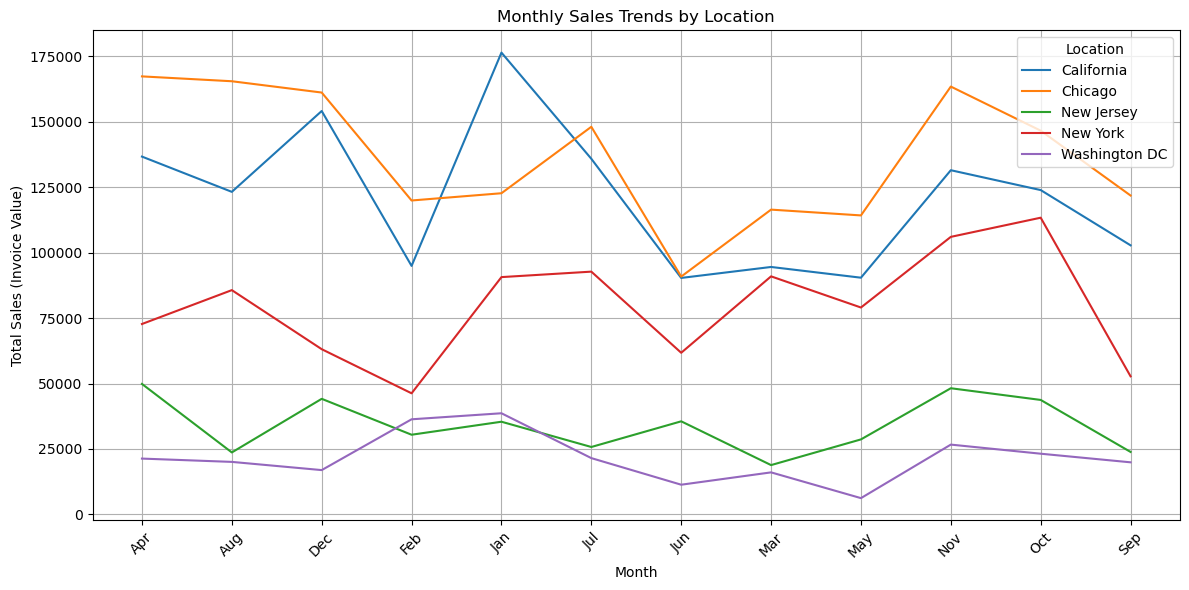

In [60]:
# Aggregate sales data by Month, Product_Category, and Location
monthly_category_sales = merged_data.groupby(['Month', 'Product_Category'])['Invoice_Value'].sum().reset_index()
monthly_location_sales = merged_data.groupby(['Month', 'Location'])['Invoice_Value'].sum().reset_index()

# Aggregate sales data by Location and Product Category for overall trends
category_sales = merged_data.groupby('Product_Category')['Invoice_Value'].sum().reset_index()
location_sales = merged_data.groupby('Location')['Invoice_Value'].sum().reset_index()

# Plot trends for total sales by category over time (by month)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for category in monthly_category_sales['Product_Category'].unique():
    category_sales_data = monthly_category_sales[monthly_category_sales['Product_Category'] == category]
    plt.plot(category_sales_data['Month'], category_sales_data['Invoice_Value'], label=category)

plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales (Invoice Value)')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot trends for total sales by location over time (by month)
plt.figure(figsize=(12, 6))
for location in monthly_location_sales['Location'].unique():
    location_sales_data = monthly_location_sales[monthly_location_sales['Location'] == location]
    plt.plot(location_sales_data['Month'], location_sales_data['Invoice_Value'], label=location)

plt.title('Monthly Sales Trends by Location')
plt.xlabel('Month')
plt.ylabel('Total Sales (Invoice Value)')
plt.legend(title='Location')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Seasonality

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


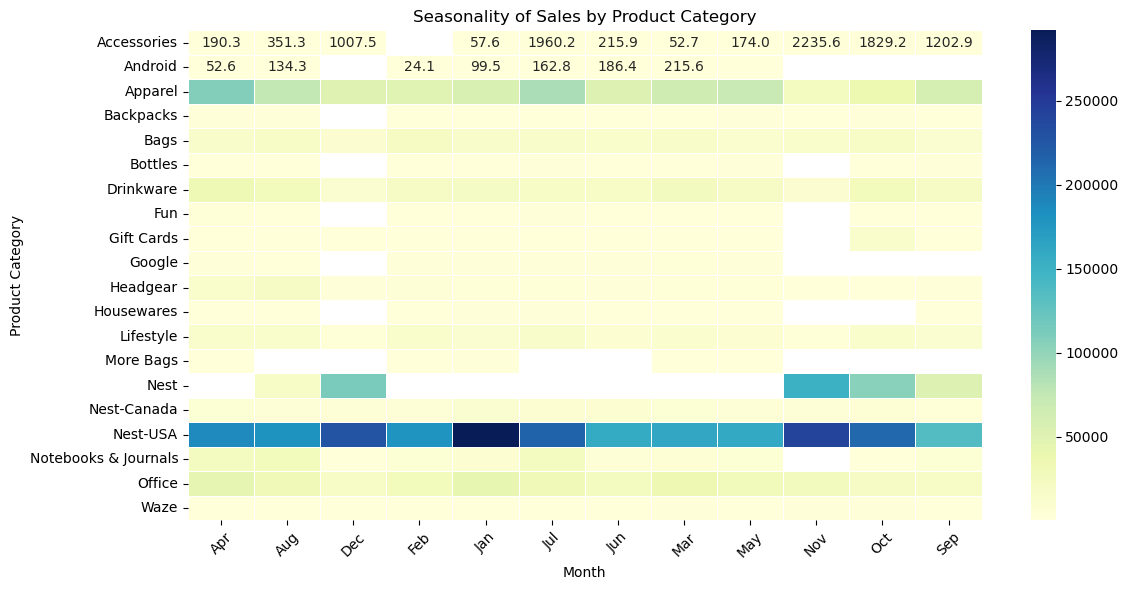

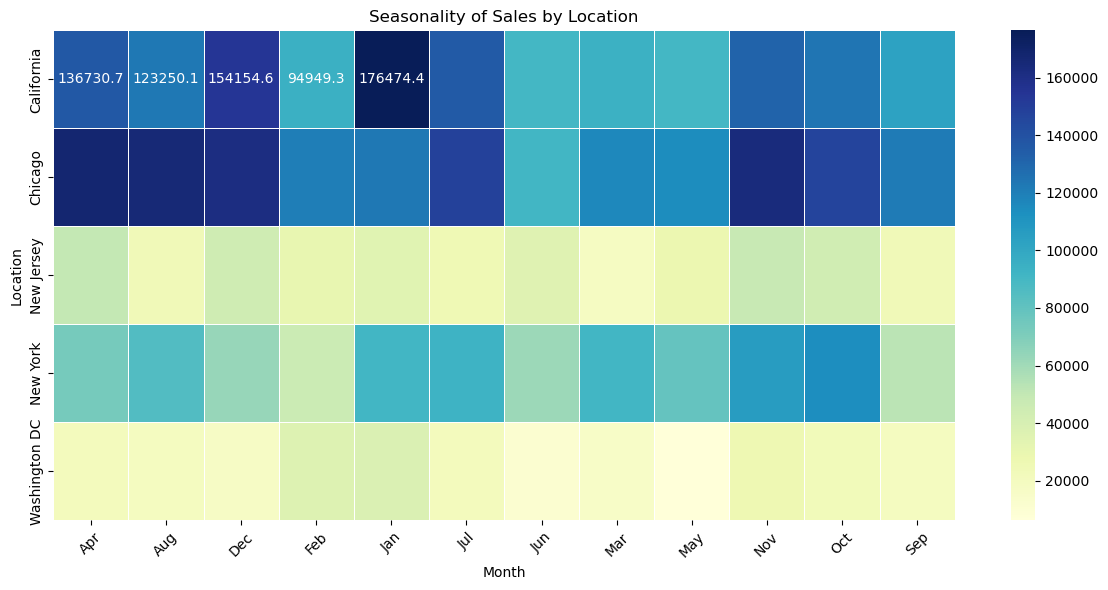

In [62]:
import seaborn as sns

# Create a pivot table for monthly sales by category
pivot_category = monthly_category_sales.pivot_table(index='Product_Category', columns='Month', values='Invoice_Value', aggfunc='sum')

# Plot heatmap for monthly sales trends by category
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_category, annot=True, cmap="YlGnBu", fmt='.1f', linewidths=.5)
plt.title('Seasonality of Sales by Product Category')
plt.ylabel('Product Category')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a pivot table for monthly sales by location
pivot_location = monthly_location_sales.pivot_table(index='Location', columns='Month', values='Invoice_Value', aggfunc='sum')

# Plot heatmap for monthly sales trends by location
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_location, annot=True, cmap="YlGnBu", fmt='.1f', linewidths=.5)
plt.title('Seasonality of Sales by Location')
plt.ylabel('Location')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### How number order varies and sales with different days?

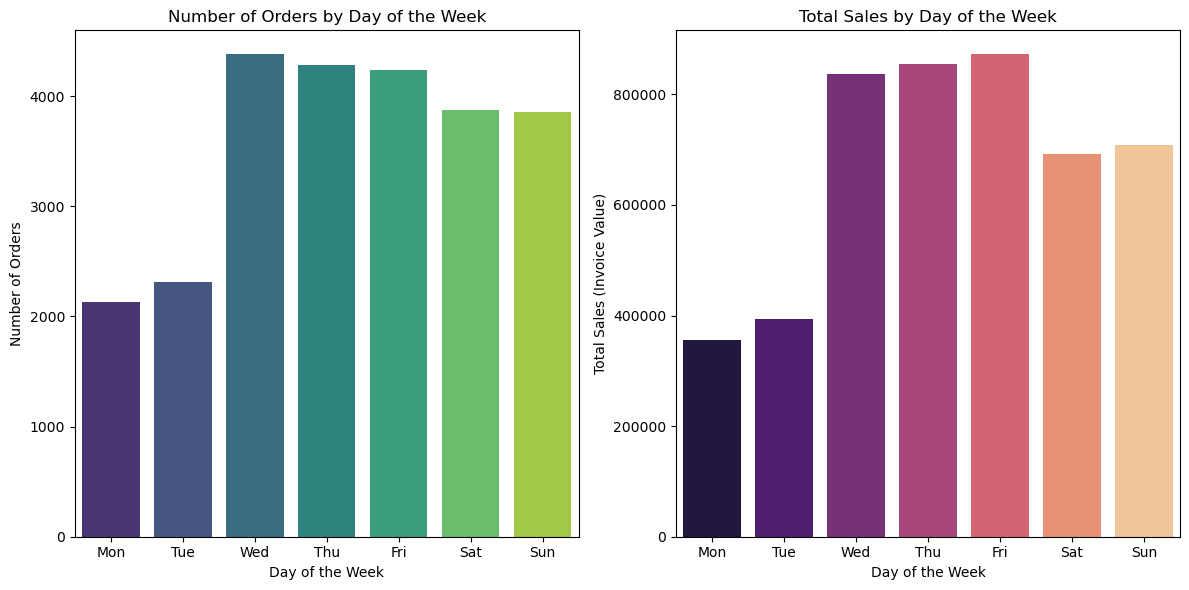

In [64]:
# Ensure 'Transaction_Date' is in datetime format
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'], errors='coerce')

# Extract day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
merged_data['Day_of_Week'] = merged_data['Transaction_Date'].dt.dayofweek

# Calculate total sales ('Invoice_Value') and number of orders for each day of the week
daily_sales = merged_data.groupby('Day_of_Week')['Invoice_Value'].sum().reset_index()
daily_orders = merged_data.groupby('Day_of_Week')['Transaction_ID'].nunique().reset_index()

# Plotting the number of orders and total sales for each day of the week
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for better comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Number of Orders by Day of Week
sns.barplot(x='Day_of_Week', y='Transaction_ID', data=daily_orders, ax=axes[0], palette='viridis')
axes[0].set_title('Number of Orders by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Orders')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot Total Sales by Day of Week
sns.barplot(x='Day_of_Week', y='Invoice_Value', data=daily_sales, ax=axes[1], palette='magma')
axes[1].set_title('Total Sales by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Sales (Invoice Value)')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [66]:

# Assuming `Total_Marketing_Spend` contains values that might be in annual or high-level cumulative form.
# To get accurate monthly values, let's ensure we calculate monthly totals directly from `Offline_Spend` and `Online_Spend`.

# Calculate monthly totals for each spend type if cumulative values were used initially.
monthly_data = merged_data.groupby('Month_Year').agg({
    'Invoice_Value': 'sum',            # Sum up invoice values per month
    'Offline_Spend': 'sum',            # Sum offline spend per month
    'Online_Spend': 'sum',             # Sum online spend per month
    'GST': 'mean',                     # Assuming average GST rate per month
    'Delivery_Charges': 'sum'          # Sum of delivery charges per month
}).reset_index()

# Recalculate total marketing spend per month
monthly_data['Total_Marketing_Spend'] = monthly_data['Offline_Spend'] + monthly_data['Online_Spend']

# Percentage of Marketing Spend out of Revenue
monthly_data['Marketing_Spend_Percentage'] = (monthly_data['Total_Marketing_Spend'] / monthly_data['Invoice_Value']) * 100

# Percentage of Delivery Charges out of Revenue
monthly_data['Delivery_Charges_Percentage'] = (monthly_data['Delivery_Charges'] / monthly_data['Invoice_Value']) * 100


# Display the result
monthly_data[['Month_Year', 'Invoice_Value', 'Total_Marketing_Spend', 'Marketing_Spend_Percentage', 'GST', 'Delivery_Charges_Percentage']]


,Month_Year,Invoice_Value,Total_Marketing_Spend,Marketing_Spend_Percentage,GST,Delivery_Charges_Percentage
0,2019-01,463883.05705,20052775.17,4322.808274,0.131691,12.770960
1,2019-02,327896.56020,15841536.05,4831.260212,0.136114,15.009795
2,2019-03,336805.20383,17453780.31,5182.158741,0.141742,18.051960
3,2019-04,447999.19523,21655922.13,4833.919873,0.142545,9.259334
4,2019-05,318556.30056,17525521.02,5501.545877,0.144845,12.994931
5,2019-06,289830.32931,18625403.73,6426.312862,0.143203,12.943290
6,2019-07,423982.34361,20618934.41,4863.158743,0.144870,11.491971
7,2019-08,418160.56704,28385733.77,6788.237822,0.148522,14.611509
8,2019-09,321128.35638,19257626.34,5996.862612,0.139240,12.769168
9,2019-10,450837.46255,20536272.39,4555.138846,0.130043,10.194778


### How marketing spend is impacting on revenue?

In [68]:
merged_data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice_Value', 'YearMonth',
       'Month_Year', 'First_Purchase_Month', 'Customer_Type',
       'Discount_Amount', 'Week', 'Day', 'Day_of_Week'],
      dtype='object')

In [69]:
# Ensure that the relevant columns are available and correctly formatted
merged_data['Total_Marketing_Spend'] = merged_data['Offline_Spend'] + merged_data['Online_Spend']

# Calculate the correlation between marketing spend (offline + online) and invoice (revenue)
correlation = merged_data[['Total_Marketing_Spend', 'Invoice_Value']].corr()

# Display the correlation matrix
print(correlation)

                       Total_Marketing_Spend  Invoice_Value
Total_Marketing_Spend               1.000000       0.037761
Invoice_Value                       0.037761       1.000000


### Which product was appeared in the transactions?

In [71]:
# Count the number of transactions per product (based on Product_SKU or Product_Description)
product_transactions = merged_data.groupby('Product_SKU')['Transaction_ID'].nunique().reset_index()

# Alternatively, if you want to use Product_Description
product_description_transactions = merged_data.groupby('Product_Description')['Transaction_ID'].nunique().reset_index()

# Sort the result by number of transactions (optional)
product_transactions_sorted = product_transactions.sort_values(by='Transaction_ID', ascending=False).reset_index(drop=True)
product_description_transactions_sorted = product_description_transactions.sort_values(by='Transaction_ID', ascending=False).reset_index(drop=True)

# Display the most frequent products in transactions
print("Most frequent products by SKU:")
print(product_transactions_sorted.head())  # Display top products by SKU

print("\nMost frequent products by Description:")
print(product_description_transactions_sorted.head())  # Display top products by Description


Most frequent products by SKU:
      Product_SKU  Transaction_ID
0  GGOENEBJ079499            3511
1  GGOENEBQ078999            3328
2  GGOENEBB078899            3230
3  GGOENEBQ079099            1361
4  GGOENEBQ084699            1089

Most frequent products by Description:
                                 Product_Description  Transaction_ID
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...            3511
1             Nest Cam Outdoor Security Camera - USA            3328
2              Nest Cam Indoor Security Camera - USA            3230
3    Nest Protect Smoke + CO White Battery Alarm-USA            1361
4       Nest Learning Thermostat 3rd Gen-USA - White            1089


### Which product was purchased mostly based on the quantity?

In [73]:
# Group by Product_SKU and sum the Quantity
product_quantity = merged_data.groupby('Product_SKU')['Quantity'].sum().reset_index()

# Alternatively, if you want to use Product_Description
product_description_quantity = merged_data.groupby('Product_Description')['Quantity'].sum().reset_index()

# Sort the result by total quantity purchased (optional)
product_quantity_sorted = product_quantity.sort_values(by='Quantity', ascending=False).reset_index(drop=True)
product_description_quantity_sorted = product_description_quantity.sort_values(by='Quantity', ascending=False).reset_index(drop=True)

# Display the most purchased products based on quantity
print("Most purchased products by SKU (based on quantity):")
print(product_quantity_sorted.head())  # Display top products by SKU

print("\nMost purchased products by Description (based on quantity):")
print(product_description_quantity_sorted.head())  # Display top products by Description


Most purchased products by SKU (based on quantity):
      Product_SKU  Quantity
0  GGOEGGOA017399     16234
1  GGOEGDHC018299      9728
2  GGOEGBMJ013399      7321
3  GGOEGOLC014299      6496
4  GGOEGFKQ020399      5847

Most purchased products by Description (based on quantity):
            Product_Description  Quantity
0                      Maze Pen     16234
1     Google 22 oz Water Bottle     14282
2             Google Sunglasses     11452
3                     Sport Bag      7321
4  Google Metallic Notebook Set      6496


# 3. Performing Customer Segmentation

### a) Heuristic (Value based, RFM) 

In [76]:
# Get the current date for recency calculation
current_date = merged_data['Transaction_Date'].max() + pd.DateOffset(days=1)

# Calculate Recency (time since the last purchase)
rfm = merged_data.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (current_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Invoice_Value': 'sum'  # Monetary
}).reset_index()

# Rename the columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Normalize Recency, Frequency, and Monetary to assign scores (1 to 5 scale)
# You can use quantiles to split the customers into different groups.

rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine the scores into a single RFM score
rfm['RFM_Score'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str)

# Segmentation of customers
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Premium'
    elif row['RFM_Score'] >= '445':
        return 'Gold'
    elif row['RFM_Score'] >= '335':
        return 'Silver'
    else:
        return 'Standard'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Display the RFM table with customer segmentation
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Segment']]

,CustomerID,Recency,Frequency,Monetary,Segment
0,12346,108,2,174.98174,Standard
1,12347,60,60,12090.29580,Gold
2,12348,74,23,1501.92620,Silver
3,12350,18,17,1183.71394,Gold
4,12356,108,36,1753.45086,Silver
...,...,...,...,...,...
1463,18259,271,7,816.40980,Standard
1464,18260,88,40,2647.24033,Silver
1465,18269,195,8,155.66092,Standard
1466,18277,70,1,301.02000,Silver


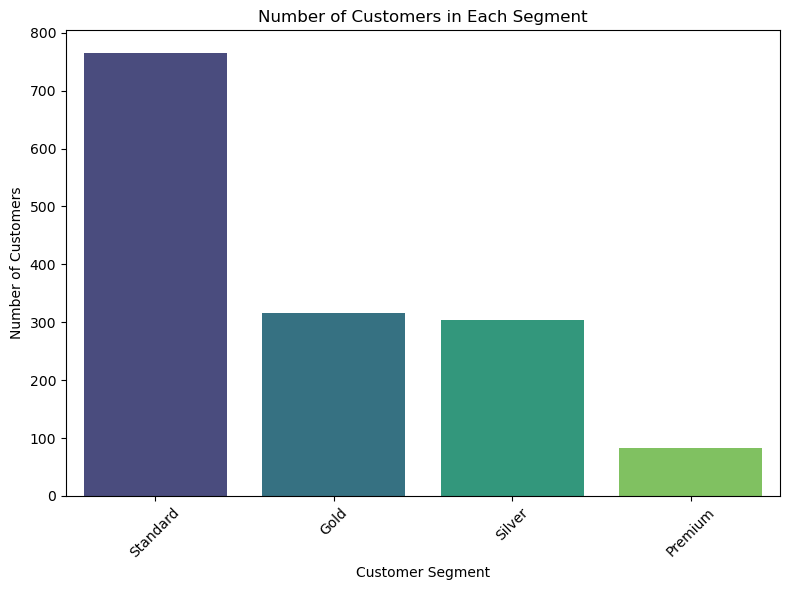

In [77]:
# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Customer_Count', data=segment_counts, palette='viridis')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#### Strategies for each customer segment:

##### Premium:
- Strategy: Retain and reward loyalty.
- Tactics: Exclusive offers, VIP access, personalized communication.

##### Gold:
- Strategy: Encourage more engagement and loyalty.
- Tactics: Targeted promotions, loyalty rewards, regular follow-ups.

##### Silver:
- Strategy: Increase frequency and spending.
- Tactics: Discounts, product recommendations, special offers.

##### Standard:
- Strategy: Boost engagement and purchasing.
- Tactics: Re-engagement campaigns, limited-time discounts, product suggestions.

### b)  K-Means segmentation

      Recency   Frequency      Monetary  CustomerID   Segment
0   78.203166   26.267810   2241.998560         758   Premium
1  255.359347   20.695100   1753.392052         551      Gold
2   85.435065  121.155844  11271.511233         154    Silver
3   30.200000  590.400000  62628.980018           5  Standard


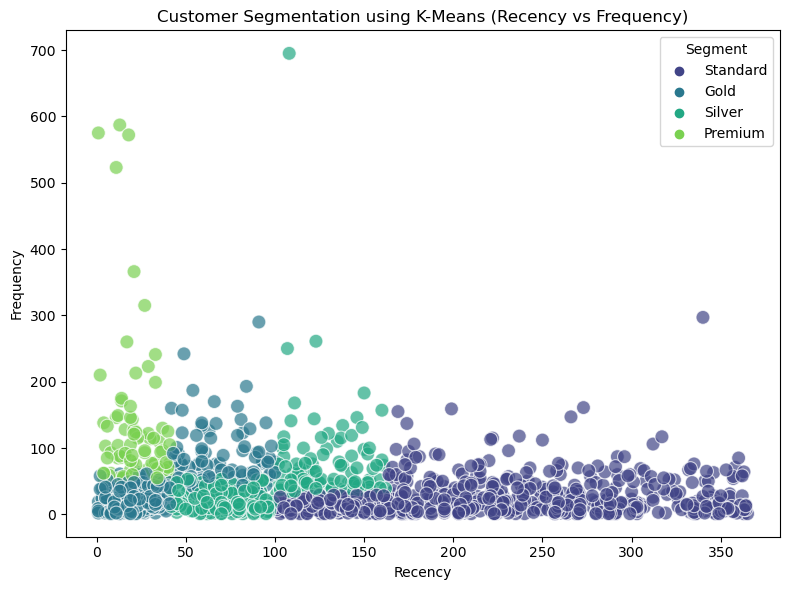

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare your customer data (you can include features like RFM or other variables)
customer_data = rfm[['Recency', 'Frequency', 'Monetary']]  # Or other relevant features

# Scaling the data (important for K-Means clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters for Premium, Gold, Silver, Standard
kmeans.fit(scaled_data)

# Assign cluster labels to the original data
rfm['Cluster'] = kmeans.labels_

# Analyzing the profiles of each cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()

# Renaming clusters to meaningful names
cluster_summary['Segment'] = cluster_summary['Cluster'].map({
    0: 'Premium',
    1: 'Gold',
    2: 'Silver',
    3: 'Standard'
})

# Dropping the Cluster column for a cleaner output
cluster_summary = cluster_summary.drop(columns=['Cluster'])

# Display the summary of customer segments
print(cluster_summary)

# Visualization: Plot the clusters based on 'Recency' and 'Frequency'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation using K-Means (Recency vs Frequency)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

#### Strategy for each segment:

##### Premium:
- Profile: High Monetary value, moderate Recency, and moderate Frequency.
- Strategy: These are your most valuable customers. Offer them exclusive deals, personalized recommendations, loyalty rewards, or VIP customer support to maintain and deepen the relationship.

##### Gold:
- Profile: High Monetary value, but lower Recency and Frequency compared to Premium.
- Strategy: Target them with retention strategies, such as targeted email campaigns, rewards programs, or time-limited promotions to increase their frequency and recency.
-
##### Silver:
- Profile: Lower Monetary and Frequency values, but a very high Recency.
- Strategy: These customers have recently interacted but are not spending much. Re-engage them with personalized offers to increase their purchase value and frequency. Incentivize repeat purchases through discounts or promotions.

##### Standard:
- Profile: Low across all metrics (Recency, Frequency, and Monetary).
- Strategy: These customers are at risk of churning. Use re-engagement campaigns like "win-back" offers, personalized discounts, or special offers to bring them back into the fold. Focus on improving their interaction and frequency with the brand.

# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [83]:
merged_data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice_Value', 'YearMonth',
       'Month_Year', 'First_Purchase_Month', 'Customer_Type',
       'Discount_Amount', 'Week', 'Day', 'Day_of_Week',
       'Total_Marketing_Spend'],
      dtype='object')

### Classification Model

#### a. Create the Dependent Variable (CLV)

In [86]:
# Summing up the Invoice_Value for each customer to calculate their total revenue
customer_revenue = merged_data.groupby('CustomerID')['Invoice_Value'].sum().reset_index()

# Define the CLV categories: low, medium, high based on total revenue
# We can use quantiles to divide customers into three groups
customer_revenue['CLV'] = pd.qcut(customer_revenue['Invoice_Value'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])

# Merge back to the original data to include the CLV category for each customer
merged_data = pd.merge(merged_data, customer_revenue[['CustomerID', 'CLV']], on='CustomerID', how='left')

# Check the new data with CLV category
print(merged_data[['CustomerID', 'Invoice_Value', 'CLV']].head())


   CustomerID  Invoice_Value         CLV
0       17850       158.6729  High Value
1       17850       158.6729  High Value
2       17850         8.5295  High Value
3       17850        99.5843  High Value
4       17850        24.0230  High Value


#### b. Train a Classification Model

##### Prepare Features and Target Variable

In [89]:
# Use relevant features as input for the model (excluding CustomerID)
features = ['Quantity', 'Avg_Price', 'Discount_pct', 'Delivery_Charges', 'Tenure_Months', 
            'Offline_Spend', 'Online_Spend', 'GST', 'Total_Marketing_Spend', 'Location', 'Gender']
X = merged_data[features]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Target variable: CLV (customer lifetime value)
y = merged_data['CLV']

##### Train a Model (Random Forest)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  High Value       0.96      1.00      0.98     11424
   Low Value       0.98      0.79      0.87      1123
Medium Value       0.98      0.93      0.95      3331

    accuracy                           0.97     15878
   macro avg       0.97      0.90      0.93     15878
weighted avg       0.97      0.97      0.97     15878

[[11389     4    31]
 [  200   883    40]
 [  228    14  3089]]


- High Value: Excellent precision and recall (no false negatives).
- Low Value: High precision, but lower recall (some misclassifications).
- Medium Value: Great balance in precision and recall.
- Accuracy: 97% overall.
- Confusion Matrix: High Value customers are well classified; Low Value has some misclassifications.

# 5. Cross-Selling

In [94]:
!pip install --upgrade mlxtend

### Applying Market Basket Analysis (Apriori Algorithm):

In [96]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create the basket matrix based on Transaction_ID and Product_Category
basket = merged_data.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets with minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)

# Check if 'num_itemsets' argument is required
try:
    # Extract association rules from the frequent itemsets using the 'lift' metric
    association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
except TypeError:
    # If 'num_itemsets' is required by an older version
    frequent_itemsets['num_itemsets'] = frequent_itemsets['support'] * len(basket)
    association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5, num_itemsets=frequent_itemsets['num_itemsets'])

# Display the association rules DataFrame
print("Association Rules:")
print(association_rules_df)

# Display the frequent itemsets
print("\nFrequent Itemsets:")
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: list(x))
print(frequent_itemsets)


Association Rules:
   antecedents  consequents  antecedent support  consequent support   support  \
0    (Apparel)  (Drinkware)            0.324369            0.100714  0.045010   
1  (Drinkware)    (Apparel)            0.100714            0.324369  0.045010   
2    (Apparel)  (Lifestyle)            0.324369            0.068313  0.033079   
3  (Lifestyle)    (Apparel)            0.068313            0.324369  0.033079   
4    (Apparel)     (Office)            0.324369            0.140697  0.062128   
5     (Office)    (Apparel)            0.140697            0.324369  0.062128   
6     (Office)  (Drinkware)            0.140697            0.100714  0.046287   
7  (Drinkware)     (Office)            0.100714            0.140697  0.046287   
8     (Office)  (Lifestyle)            0.140697            0.068313  0.035114   
9  (Lifestyle)     (Office)            0.068313            0.140697  0.035114   

   confidence      lift  representativity  leverage  conviction  \
0    0.138762  1.37778

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#### Insights:
- Apparel & Drinkware: Frequently purchased together, with a moderate lift (1.38). This pairing is suitable for bundling in promotions.

- Apparel & Lifestyle: Also commonly paired, with a higher lift (1.49), suggesting a strong association and good cross-selling potential.

- Office & Drinkware: Shows high lift (3.27), indicating a very strong relationship and an ideal pairing for bundle offers.

- Office & Lifestyle: Another strong pair, with a high lift (3.65). This combination could be promoted as a package deal.

- Product Popularity: "Nest-USA" is the most common item (46% of transactions), ideal as a base item in cross-sell offers with other less frequent products.

# 6. Predicting Next Purchase Day

### Build Classifcation Model

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'merged_data' is your DataFrame

# Convert 'Transaction_Date' to datetime if not already
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'])

# Filter for repeat customers (more than 1 transaction)
repeat_customers = merged_data.groupby('CustomerID').filter(lambda x: len(x) > 1)

# Calculate average days between transactions for each customer
average_days = repeat_customers.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).reset_index()

# Rename the column to avoid confusion
average_days.columns = ['CustomerID', 'Average_Days_Between_Transactions']

# Create the target variable by binning 'Average_Days_Between_Transactions'
average_days['Next_Purchase_Category'] = pd.cut(
    average_days['Average_Days_Between_Transactions'], 
    bins=[-1, 30, 60, 90, float('inf')], 
    labels=['0-30 days', '30-60 days', '60-90 days', '90+ days']
)

In [179]:
# Merge the average days data with original dataset to retain features
data_for_model = pd.merge(merged_data.drop_duplicates(subset='CustomerID'), 
                          average_days[['CustomerID', 'Next_Purchase_Category']], 
                          on='CustomerID', how='inner')


In [181]:
from sklearn.preprocessing import LabelEncoder

# Select relevant features (drop Transaction_ID and date-related columns)
features = data_for_model.drop(['Next_Purchase_Category', 'Transaction_ID', 'Transaction_Date', 
                                'Cohort_Month', 'Transaction_Month', 'Cohort_Index'], axis=1)

# Encode categorical features
for column in features.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    features[column] = label_encoder.fit_transform(features[column])

# Define target variable
X = features
y = data_for_model['Next_Purchase_Category']


In [186]:
# Check if there are any non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Encode all non-numeric columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

for column in non_numeric_columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

# Verify that X is now all numeric
print(X.dtypes)


CustomerID                        int64
Product_SKU                       int32
Product_Description               int32
Product_Category                  int32
Quantity                          int64
Avg_Price                       float64
Delivery_Charges                float64
Coupon_Status                     int32
Month                             int32
Gender                            int32
Location                          int32
Tenure_Months                     int64
Coupon_Code                       int32
Discount_pct                    float64
GST                             float64
Date                     datetime64[ns]
Offline_Spend                     int64
Online_Spend                    float64
Invoice_Value                   float64
YearMonth                     period[M]
Month_Year                    period[M]
First_Purchase_Month          period[M]
Customer_Type                     int32
Discount_Amount                 float64
Week                             UInt32


In [192]:
# Check the columns in temp DataFrame
print("Columns in temp:", temp.columns)

Columns in temp: Index(['CustomerID', 'avg_days_between_transactions',
       'Next_Purchase_Category'],
      dtype='object')


In [194]:
# Check the columns in temp DataFrame
print("Columns in temp:", temp.columns)

# Define features and target variable
# Only drop columns if they exist in temp to prevent KeyError
X = temp.drop(columns=[col for col in ['Next_Purchase_Category', 'CustomerID', 'Date'] if col in temp.columns])  
y = temp['Next_Purchase_Category']

# Encode categorical features
label_encoder = LabelEncoder()
for column in ['CLV']:  # Update if there are other categorical features
    if column in X.columns:
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Columns in temp: Index(['CustomerID', 'avg_days_between_transactions',
       'Next_Purchase_Category'],
      dtype='object')
Accuracy: 1.00


# 7. Cohort analysis 

#### Step 1: Extract the Cohort Start Month for Each Customer

In [155]:
# Convert Transaction_Date to datetime format if not already
merged_data['Transaction_Date'] = pd.to_datetime(merged_data['Transaction_Date'])

# Get the cohort start month for each customer (first purchase month)
merged_data['Cohort_Month'] = merged_data.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')


#### Step 2: Calculate the Monthly Cohort Retention Table

In [157]:
# Add columns for each transaction's month and relative month
merged_data['Transaction_Month'] = merged_data['Transaction_Date'].dt.to_period('M')
merged_data['Cohort_Index'] = (merged_data['Transaction_Month'] - merged_data['Cohort_Month']).apply(lambda x: x.n)

# Count the unique customers in each Cohort_Month and Cohort_Index
cohort_data = merged_data.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].nunique().reset_index()

# Pivot the data to get the cohort retention table
cohort_pivot = cohort_data.pivot(index='Cohort_Month', columns='Cohort_Index', values='CustomerID')


#### Step 3: Calculate Retention Rates

In [159]:
# Divide each row by the first column to get retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_table = cohort_pivot.divide(cohort_size, axis=0)


#### Step 4: Identify the Cohort with Maximum Retention

In [161]:
# Find the maximum retention in each month (column-wise) and identify the cohort
max_retention_by_month = retention_table.idxmax()
print("Cohort with maximum retention each month:")
print(max_retention_by_month)


Cohort with maximum retention each month:
Cohort_Index
0     2019-01
1     2019-06
2     2019-03
3     2019-02
4     2019-03
5     2019-02
6     2019-02
7     2019-01
8     2019-02
9     2019-01
10    2019-02
11    2019-01
dtype: period[M]


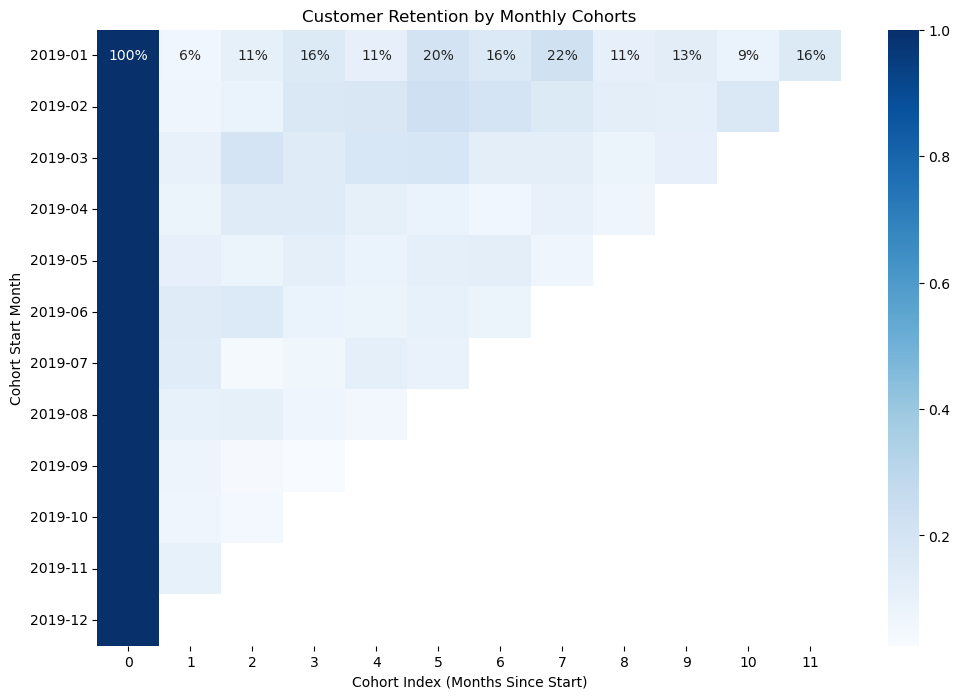

In [171]:
# Visualize the Cohort Retention Table
plt.figure(figsize=(12, 8))
sns.heatmap(retention_table, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention by Monthly Cohorts')
plt.xlabel('Cohort Index (Months Since Start)')
plt.ylabel('Cohort Start Month')
plt.show()
